In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


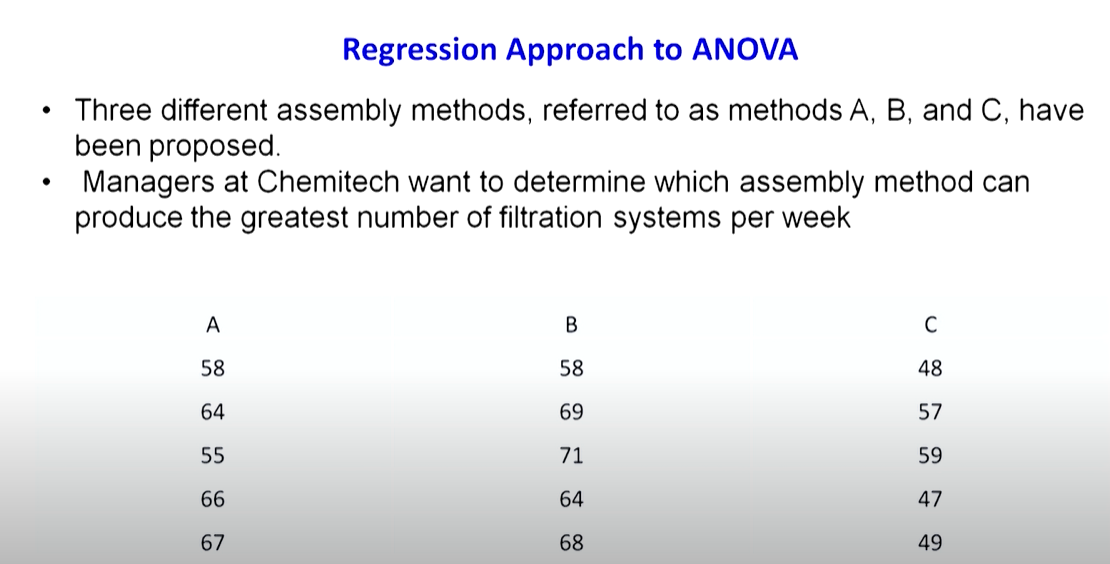

 # Method 1 : ANOVA 

In [7]:
df = pd.DataFrame({'A':[58,64,55,66,67],'B':[58,69,71,64,68],'C':[48,57,59,47,49]})
df

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [ ]:
# We have to find which assembly mehtod is best
# As usual we will assume that all assembly method is same  NULL HYP : Ho:mu_a=mu_b=mu_c
# If the P value is less than Alpha(0.05) we reject the NULL


In [13]:
new_df = pd.melt(df.reset_index(),id_vars=['index'])
new_df.columns=['index','treatments','value']
new_df

,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [18]:
model_1= ols('value ~C(treatments)',data=new_df).fit()
model_1.summary()

C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00382
Time:                        05:47:55   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.0000      2.380     26.045      0.000      56.813      67.187
C(treatments)[T.B]     4.0000      3.367      1.188      0.258      -3.335      11.335
C(treatments)[T.C]   -10.0000      3.367     -2.970      0.012     -17.335      -2.665
==============================================================================
Omnibus:                        3.780   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.311
Skew:                          -0.196   Prob(JB):                        0.519
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# P value is less than Alpha 
# The model is significant , we reject null hypothesis 
# There is difference between the mean of threee assembly meythods

In [19]:
anova_lm(model_1,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


# Method 2 : Regression method

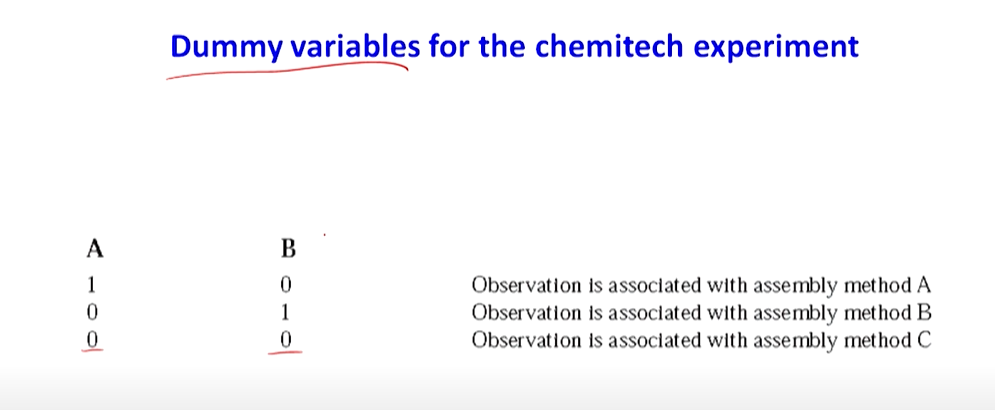

In [30]:
# We have three treatments A,B, C 
# We need only two dummy variables ((3-1))

# We can drop C column below

df_2 = pd.get_dummies(new_df['treatments'])
df_2

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [31]:
# We need only two dummy variables ((3-1))

# We can drop C column below
df_2.drop(labels =['C'],axis=1,inplace=True)
df_2


,A,B
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [34]:
final_df = pd.concat([new_df,df_2],axis=1)


# we dont need treatment column since we have replaced that by dummy variables
final_df.drop(labels=['treatments'],axis=1,inplace=True)
final_df

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [43]:
import statsmodels.api as s 

import statsmodels.regression.linear_model as sm

model_2=sm.OLS(final_df['value'],s.add_constant(final_df[['A','B']])).fit()
#anova_lm(model_2,typ=1)
model_2.summary()

C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00382
Time:                        06:14:19   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0000      2.380     21.844      0.000      46.813      57.187
A             10.0000      3.367      2.970      0.012       2.665      17.335
B             14.0000      3.367      4.159      0.001       6.665      21.335
==============================================================================
Omnibus:                        3.780   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.311
Skew:                          -0.196   Prob(JB):                        0.519
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

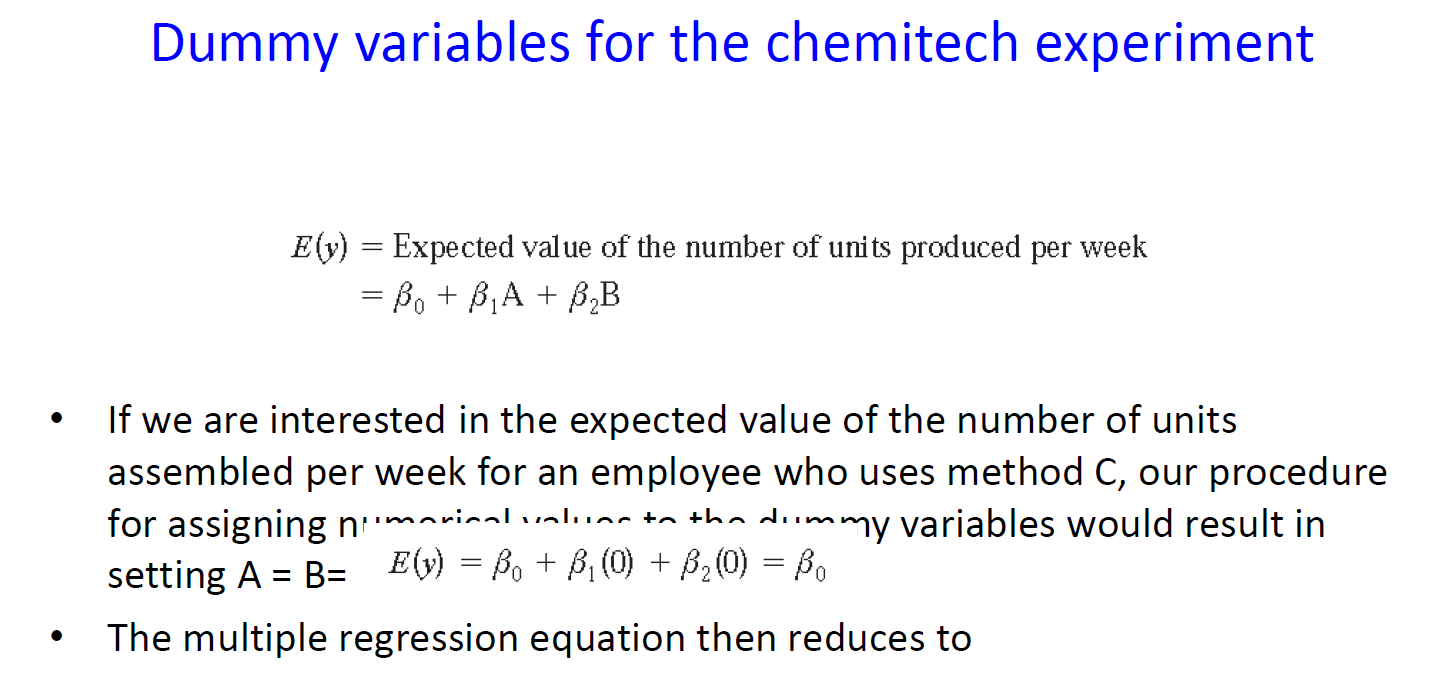
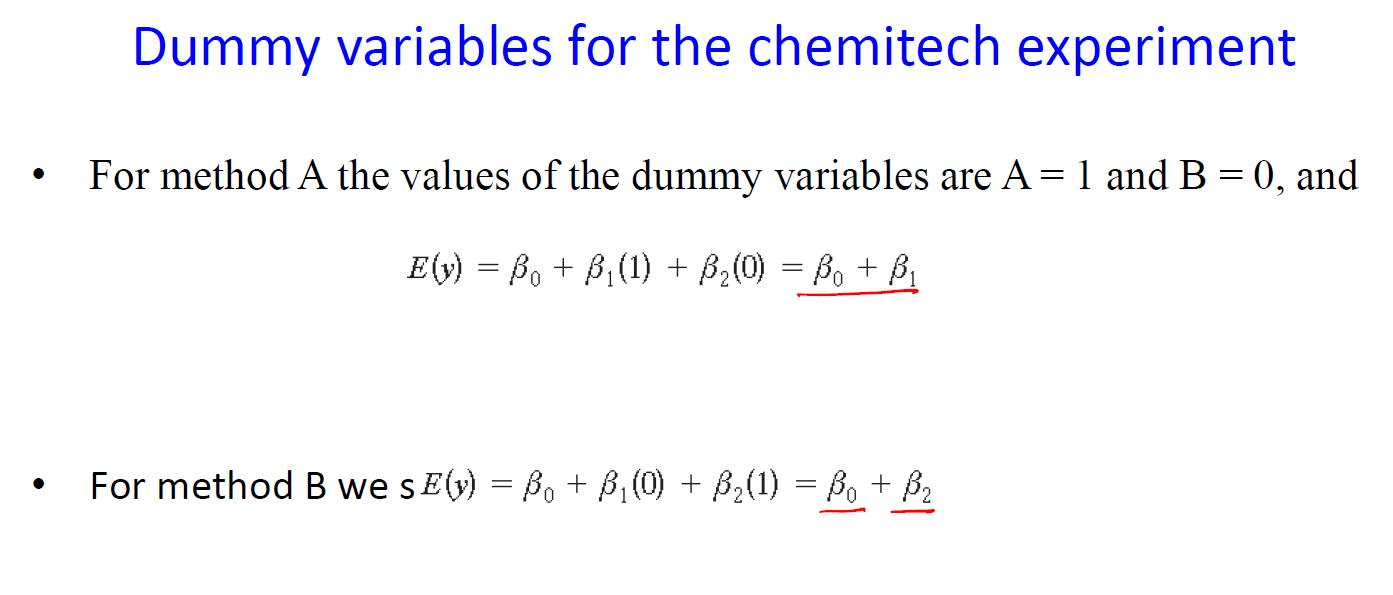
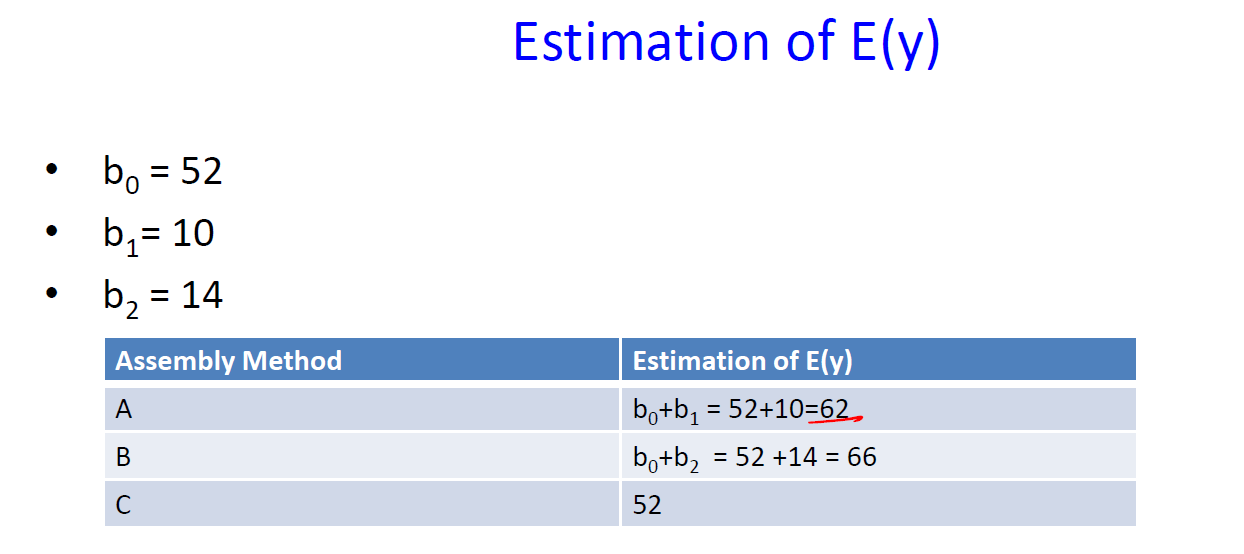

#### See the co ef in the OLS Summary 


# Assembly Method B produces more filteration system per week 